#                      Project_Civision_Herras_Adil

In [26]:
#Charger les bibliothèques
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import string
import nltk
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
%matplotlib inline
plt.rcParams['font.size'] = 12

In [6]:
#Fonction get_url qui génère une URL à partir des paramètres de position et de localisation
def get_url(position, location):
    template = 'https://www.shine.com/job-search/{position}-jobs-in-{location}?q={position}%2C+&loc={location}'
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position=position, location=location)
    return url

url = get_url('data scientist', 'Delhi')
print(url)

https://www.shine.com/job-search/data+scientist-jobs-in-Delhi?q=data+scientist%2C+&loc=Delhi


In [7]:
#Requête GET à l'URL spécifiée avec l'en-tête de l'agent utilisateur
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}
x = requests.get(url, headers=agent)

#État  de la réponse de la requête si 200 la requête a bien fonctionné 
print(x.status_code)

200


In [8]:
#BeautifulSoup pour analyser le contenu HTML de la réponse de la requête et extrait tous les éléments <div> du HTML
soup = BeautifulSoup(x.text,'html.parser')
html = soup.find_all('div')

In [9]:
#BeautifulSoup pour extraire les titres des offres d'emploi à partir des éléments h2
req_titles = soup.select('div h2[itemprop="name"]')
#Extraire le texte 
titles = [r.text for r in req_titles]

In [10]:
#Afficher les 10 premiers 
titles[:10]

['We have requirement for Data Scientist',
 'Data Scientist',
 'Req.  For Data Scientist -Reputed Data Analytics Indust ...',
 ' For Senior Data Scientist-Reputed IT Industry',
 'Req. now  Data Scientist',
 'Req. post for  Junior AI Data Scientist-Reputed IT Indu ...',
 'Senior AI Data Scientist-Reputed IT Industry',
 'Data Scientist',
 'Data Scientist',
 'Hiring now Data Scientist']

In [11]:
#Nettoyer les titres des offres d'emploi
titles = [t.replace(".", "") for t in titles]
titles = [t.replace("-", " ") for t in titles]
titles = [t.replace("  ", " ") for t in titles]
titles = [t.lstrip() for t in titles]

In [12]:
#Afficher les 10 premiers 
titles[:10]

['We have requirement for Data Scientist',
 'Data Scientist',
 'Req For Data Scientist Reputed Data Analytics Indust ',
 'For Senior Data Scientist Reputed IT Industry',
 'Req now Data Scientist',
 'Req post for Junior AI Data Scientist Reputed IT Indu ',
 'Senior AI Data Scientist Reputed IT Industry',
 'Data Scientist',
 'Data Scientist',
 'Hiring now Data Scientist']

In [13]:
#Liste d'éléments HTML
elements = soup.find_all('h2', itemprop='name')
#Parcourir chaque élément HTML pour extraire le lien
for element in elements:
    link = element.find('a')
    if link:
        href = link['href']
        print(href)

/jobs/we-have-requirement-for-data-scientist-permanent/paytm/12529359/
/jobs/data-scientist-permanent/vega-intellisoft-private-limited/12517631/
/jobs/req-jobs-for-data-scientist-reputed-data-analytics-industry-permanent/seven-consultancy/12493032/
/jobs/jobs-for-senior-data-scientist-reputed-it-industry-permanent/seven-consultancy/12498116/
/jobs/req-now-data-scientist-permanent/seven-consultancy/12493691/
/jobs/req-post-for-junior-ai-data-scientist-reputed-it-industry-delhi-permanent/seven-consultancy/12494691/
/jobs/senior-ai-data-scientist-reputed-it-industry-permanent/seven-consultancy/12492884/
/jobs/data-scientist-permanent/iris-software-pvt-ltd/12490794/
/jobs/data-scientist-permanent/quiscon-biotech/12484543/
/jobs/hiring-now-data-scientist-permanent/skyleaf-consultants/12485237/
/jobs/senior-data-scientist-international-permanent/toptal-llc/12486433/
/jobs/data-scientist-permanent/quiscon-biotech/12494670/
/jobs/data-scientist-nlpmlpython-permanent/elixir-web-solutions/124768

In [14]:
#List vide pour les liens
href_list = []

# Liste d'éléments HTML
elements = soup.find_all('h2', itemprop='name')

# Parcourir chaque élément HTML et extraire le lien
for element in elements:
    link = element.find('a')
    if link:
        href = link['href']
        href_list.append(href)

# Print la list
print(href_list)

['/jobs/we-have-requirement-for-data-scientist-permanent/paytm/12529359/', '/jobs/data-scientist-permanent/vega-intellisoft-private-limited/12517631/', '/jobs/req-jobs-for-data-scientist-reputed-data-analytics-industry-permanent/seven-consultancy/12493032/', '/jobs/jobs-for-senior-data-scientist-reputed-it-industry-permanent/seven-consultancy/12498116/', '/jobs/req-now-data-scientist-permanent/seven-consultancy/12493691/', '/jobs/req-post-for-junior-ai-data-scientist-reputed-it-industry-delhi-permanent/seven-consultancy/12494691/', '/jobs/senior-ai-data-scientist-reputed-it-industry-permanent/seven-consultancy/12492884/', '/jobs/data-scientist-permanent/iris-software-pvt-ltd/12490794/', '/jobs/data-scientist-permanent/quiscon-biotech/12484543/', '/jobs/hiring-now-data-scientist-permanent/skyleaf-consultants/12485237/', '/jobs/senior-data-scientist-international-permanent/toptal-llc/12486433/', '/jobs/data-scientist-permanent/quiscon-biotech/12494670/', '/jobs/data-scientist-nlpmlpython

In [15]:
#créer le DataFrame
df = pd.DataFrame({'Titles':titles, 'Links': href_list})

In [16]:
#Afficher le df 
df

Titles  \
0              We have requirement for Data Scientist   
1                                      Data Scientist   
2   Req For Data Scientist Reputed Data Analytics ...   
3       For Senior Data Scientist Reputed IT Industry   
4                              Req now Data Scientist   
5   Req post for Junior AI Data Scientist Reputed ...   
6        Senior AI Data Scientist Reputed IT Industry   
7                                      Data Scientist   
8                                      Data Scientist   
9                           Hiring now Data Scientist   
10               Senior Data Scientist  International   
11                                     Data Scientist   
12                      Data Scientist  NLP/ML/Python   
13                                     Data Scientist   
14                                  Sr Data Scientist   
15                 Senior Analyst  Data Scientist  IT   
16   Recruitment of Scientist Data Platform Optimizer   
17                      Octro  Data Scientist  Gaming   
18                   Mahindra Comviva  Data Scientist   
19            Assistant Manager/Manager  Data Science   

                                                Links  
0   /jobs/we-have-requirement-for-data-scientist-p...  
1   /jobs/data-scientist-permanent/vega-intellisof...  
2   /jobs/req-jobs-for-data-scientist-reputed-data...  
3   /jobs/jobs-for-senior-data-scientist-reputed-i...  
4   /jobs/req-now-data-scientist-permanent/seven-c...  
5   /jobs/req-post-for-junior-ai-data-scientist-re...  
6   /jobs/senior-ai-data-scientist-reputed-it-indu...  
7   /jobs/data-scientist-permanent/iris-software-p...  
8   /jobs/data-scientist-permanent/quiscon-biotech...  
9   /jobs/hiring-now-data-scientist-permanent/skyl...  
10  /jobs/senior-data-scientist-international-perm...  
11  /jobs/data-scientist-permanent/quiscon-biotech...  
12  /jobs/data-scientist-nlpmlpython-permanent/eli...  
13  /jobs/data-scientist-permanent/srinsoft-techno...  
14  /jobs/sr-data-scientist-permanent/target-corpo...  
15  /jobs/senior-analyst-data-scientist-it-permane...  
16  /jobs/recruitment-of-scientist-data-platform-o...  
17  /jobs/octro-data-scientist-gaming-permanent/oc...  
18  /jobs/mahindra-comviva-data-scientist-permanen...  
19  /jobs/assistant-managermanager-data-science-pe...

In [17]:
#Afficher
df['Links']

0     /jobs/we-have-requirement-for-data-scientist-p...
1     /jobs/data-scientist-permanent/vega-intellisof...
2     /jobs/req-jobs-for-data-scientist-reputed-data...
3     /jobs/jobs-for-senior-data-scientist-reputed-i...
4     /jobs/req-now-data-scientist-permanent/seven-c...
5     /jobs/req-post-for-junior-ai-data-scientist-re...
6     /jobs/senior-ai-data-scientist-reputed-it-indu...
7     /jobs/data-scientist-permanent/iris-software-p...
8     /jobs/data-scientist-permanent/quiscon-biotech...
9     /jobs/hiring-now-data-scientist-permanent/skyl...
10    /jobs/senior-data-scientist-international-perm...
11    /jobs/data-scientist-permanent/quiscon-biotech...
12    /jobs/data-scientist-nlpmlpython-permanent/eli...
13    /jobs/data-scientist-permanent/srinsoft-techno...
14    /jobs/sr-data-scientist-permanent/target-corpo...
15    /jobs/senior-analyst-data-scientist-it-permane...
16    /jobs/recruitment-of-scientist-data-platform-o...
17    /jobs/octro-data-scientist-gaming-permanen

In [18]:
#Chercher la description de chaque offre d'emploi 
job_descr_txt = []

#Convertir une série en listes de chaînes de caractères
my_super_fun_Shine_links = list(df['Links'])

#Parcourir les links
for i in range(len(my_super_fun_Shine_links)):
    url_href = 'https://www.shine.com' + my_super_fun_Shine_links[i]
    url_href = url_href.rstrip('/')
    url_href = str(url_href)
    
    # Récupérer le contenu HTML
    response = requests.get(url_href, headers=agent)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    
    #Trouver l'élément de description du poste et extraire le texte
    job_descr = soup.find('div', {'class': 'jobDetail_jsrpRightDetail_text__jqs8a'})
    if job_descr:
        job_descr_text = job_descr.text.strip()
    else:
        job_descr_text = ''
    
    #Ajouter la description du poste à la liste
    job_descr_txt.append([i, job_descr_text])

job_descr_txt

[[0,
  "About Paytm :\r\nPaytm is India s leading digital payments and financial services company, which is focused on driving consumers and merchants to its platform by offering them a variety of payment use cases. Paytm provides consumers with services like utility payments and money transfers, while empowering them to pay via Paytm Payment Instruments (PPI) like Paytm Wallet, Paytm UPI, Paytm Payments Bank Net banking, Paytm FASTag and Paytm Post-paid - Buy Now, Pay Later. To merchants, Paytm offers acquiring devices like Soundbox, EDC, QR and Payment Gateway where payment aggregation is done through PPI and also other banks financial instruments. To further enhance merchants business, Paytm offers merchants commerce services through advertising and Paytm Mini app store. Operating on this platform leverage, the company then offers credit services such as merchant loans, personal loans and BNPL, sourced by its financial partners.\r\n\xa0\r\nAbout the team: \r\nWe are a growing team o

In [19]:
#type
type(job_descr_txt)

list

In [20]:
#Créer un dictionnaire avec des valeurs sous forme de listes
dct_lst= defaultdict(list)
for i in job_descr_txt:
    dct_lst[i[0]].append(i[1])
    
dict_lst_jobsDescr=[]
for i in dct_lst.values(): 
    dict_lst_jobsDescr.append(''.join(i))
    
#Afficher la dixième     
dict_lst_jobsDescr[10]

'Our full-stack Data Science Team uses Python for research and development and leverages Google Cloud Platform for production implementation. Our wide range of experience includes NLP, graph theory, recommendations systems, supervised and unsupervised problems. As part of the team you are free to use the approach you see fit while relying on your colleague s previous experience and expertise.\nThe ultimate goal is to solve real business problems. Our team works on problems that profoundly affect the operation of our business. We address these problems by using predictive models, automating decision-making, and other very open-ended questions. For example, our stake-holders may ask if it is feasible to predict the outcome of a particular process in order to improve our approach or to help them leverage the massive amount of feedback our users provide.\nThis is a remote position that can be done from anywhere. Due to the remote nature of this role, we are unable to provide visa sponsorsh

In [21]:
df['Job_descrption'] = dict_lst_jobsDescr

In [22]:
# List pour les 20 liens
href_list 

# Merge les URLs avec 'https://www.shine.com'
merged_urls = ['https://www.shine.com' + url_href for url_href in href_list ]

# Print les merged URLs
print(merged_urls)

['https://www.shine.com/jobs/we-have-requirement-for-data-scientist-permanent/paytm/12529359/', 'https://www.shine.com/jobs/data-scientist-permanent/vega-intellisoft-private-limited/12517631/', 'https://www.shine.com/jobs/req-jobs-for-data-scientist-reputed-data-analytics-industry-permanent/seven-consultancy/12493032/', 'https://www.shine.com/jobs/jobs-for-senior-data-scientist-reputed-it-industry-permanent/seven-consultancy/12498116/', 'https://www.shine.com/jobs/req-now-data-scientist-permanent/seven-consultancy/12493691/', 'https://www.shine.com/jobs/req-post-for-junior-ai-data-scientist-reputed-it-industry-delhi-permanent/seven-consultancy/12494691/', 'https://www.shine.com/jobs/senior-ai-data-scientist-reputed-it-industry-permanent/seven-consultancy/12492884/', 'https://www.shine.com/jobs/data-scientist-permanent/iris-software-pvt-ltd/12490794/', 'https://www.shine.com/jobs/data-scientist-permanent/quiscon-biotech/12484543/', 'https://www.shine.com/jobs/hiring-now-data-scientist-p

In [23]:
#Ajouter la colonne Full_Links
df['Full_Links'] = merged_urls

In [24]:
#Afficher le df
df

Titles  \
0              We have requirement for Data Scientist   
1                                      Data Scientist   
2   Req For Data Scientist Reputed Data Analytics ...   
3       For Senior Data Scientist Reputed IT Industry   
4                              Req now Data Scientist   
5   Req post for Junior AI Data Scientist Reputed ...   
6        Senior AI Data Scientist Reputed IT Industry   
7                                      Data Scientist   
8                                      Data Scientist   
9                           Hiring now Data Scientist   
10               Senior Data Scientist  International   
11                                     Data Scientist   
12                      Data Scientist  NLP/ML/Python   
13                                     Data Scientist   
14                                  Sr Data Scientist   
15                 Senior Analyst  Data Scientist  IT   
16   Recruitment of Scientist Data Platform Optimizer   
17                      Octro  Data Scientist  Gaming   
18                   Mahindra Comviva  Data Scientist   
19            Assistant Manager/Manager  Data Science   

                                                Links  \
0   /jobs/we-have-requirement-for-data-scientist-p...   
1   /jobs/data-scientist-permanent/vega-intellisof...   
2   /jobs/req-jobs-for-data-scientist-reputed-data...   
3   /jobs/jobs-for-senior-data-scientist-reputed-i...   
4   /jobs/req-now-data-scientist-permanent/seven-c...   
5   /jobs/req-post-for-junior-ai-data-scientist-re...   
6   /jobs/senior-ai-data-scientist-reputed-it-indu...   
7   /jobs/data-scientist-permanent/iris-software-p...   
8   /jobs/data-scientist-permanent/quiscon-biotech...   
9   /jobs/hiring-now-data-scientist-permanent/skyl...   
10  /jobs/senior-data-scientist-international-perm...   
11  /jobs/data-scientist-permanent/quiscon-biotech...   
12  /jobs/data-scientist-nlpmlpython-permanent/eli...   
13  /jobs/data-scientist-permanent/srinsoft-techno...   
14  /jobs/sr-data-scientist-permanent/target-corpo...   
15  /jobs/senior-analyst-data-scientist-it-permane...   
16  /jobs/recruitment-of-scientist-data-platform-o...   
17  /jobs/octro-data-scientist-gaming-permanent/oc...   
18  /jobs/mahindra-comviva-data-scientist-permanen...   
19  /jobs/assistant-managermanager-data-science-pe...   

                                       Job_descrption  \
0   About Paytm :\r\nPaytm is India s leading digi...   
1   Job Opening Details back to list Reference Cod...   
2   SALARY\n: upto 4 lacs \nLOCATION \n: Delhi, NC...   
3   SALARY\n: 20 LPA \nLOCATION \n: Delhi-NCR-Indi...   
4   SALARY\n: 12 LPA\nLOCATION \n: Delhi-NCR-India...   
5   SALARY\n: 20 LPA\nLOCATION \n: Delhi NCR, Indi...   
6   SALARY\n: 30 LPA \n\nVACANCIES\n: 1 \nQUALIFIC...   
7   Job Description:\r\nWe are seeking a skilled d...   
8   We are looking for a Data Scientist to analyze...   
9   Min 2 years of hands-on experience in predicti...   
10  Our full-stack Data Science Team uses Python f...   
11  Dear Sir/Ma'am,\nHope you are doing well!\nHer...   
12  Immediate Joiners required We are looking out ...   
13  Requirements 3 - 5 years of experience Qualifi...   
14  This role is with Target s Search team which u...   
15  - The Senior Data analyst responsibilities inc...   
16  *\r\nAXA XL recognizes digital, data, and info...   
17  Octro Inc. is looking for a Data Scientist who...   
18  - The finance industry has ignored billions of...   
19  Assistant Manager/Manager - Data Science ( Dee...   

                                           Full_Links  
0   https://www.shine.com/jobs/we-have-requirement...  
1   https://www.shine.com/jobs/data-scientist-perm...  
2   https://www.shine.com/jobs/req-jobs-for-data-s...  
3   https://www.shine.com/jobs/jobs-for-senior-dat...  
4   https://www.shine.com/jobs/req-now-data-scient...  
5   https://www.shine.com/jobs/req-post-for-junior...  
6   https://www.shine.com/jobs/senior-ai-data-scie...  
7   h

#Sauvegarder le DataFrame dans un fichier CSV sur la machine 

In [25]:
# Chemin et nom de fichier de destination
path = r'C:\Users\15143\Desktop\Projet_Github\Web Scrabing Indeed\Project_Civision_Herras_Adil.csv'
# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv(path, index=False)

In [27]:
#Chercher le df et et afficher l'entête 
df = pd.read_csv('Project_Civision_Herras_Adil.csv')
df.head()

Titles  \
0             We have requirement for Data Scientist   
1                                     Data Scientist   
2  Req For Data Scientist Reputed Data Analytics ...   
3      For Senior Data Scientist Reputed IT Industry   
4                             Req now Data Scientist   

                                               Links  \
0  /jobs/we-have-requirement-for-data-scientist-p...   
1  /jobs/data-scientist-permanent/vega-intellisof...   
2  /jobs/req-jobs-for-data-scientist-reputed-data...   
3  /jobs/jobs-for-senior-data-scientist-reputed-i...   
4  /jobs/req-now-data-scientist-permanent/seven-c...   

                                      Job_descrption  \
0  About Paytm :\r\nPaytm is India s leading digi...   
1  Job Opening Details back to list Reference Cod...   
2  SALARY\n: upto 4 lacs \nLOCATION \n: Delhi, NC...   
3  SALARY\n: 20 LPA \nLOCATION \n: Delhi-NCR-Indi...   
4  SALARY\n: 12 LPA\nLOCATION \n: Delhi-NCR-India...   

                                          Full_Links  
0  https://www.shine.com/jobs/we-have-requirement...  
1  https://www.shine.com/jobs/data-scientist-perm...  
2  https://www.shine.com/jobs/req-jobs-for-data-s...  
3  https://www.shine.com/jobs/jobs-for-senior-dat...  
4  https://www.shine.com/jobs/req-now-data-scient...

In [28]:
#Le nombre de lignes et le nombre de colonnes
df.shape

(20, 4)

In [29]:
#Le nombre de valeurs nulles dans chaque colonne
df.isnull().sum()

Titles            0
Links             0
Job_descrption    0
Full_Links        0
dtype: int64

In [30]:
#Print les titles
print(np.unique(df['Titles']))

['Assistant Manager/Manager  Data Science' 'Data Scientist'
 'Data Scientist  NLP/ML/Python'
 'For Senior Data Scientist Reputed IT Industry'
 'Hiring now Data Scientist' 'Mahindra Comviva  Data Scientist'
 'Octro  Data Scientist  Gaming'
 'Recruitment of Scientist Data Platform Optimizer'
 'Req For Data Scientist Reputed Data Analytics Indust '
 'Req now Data Scientist'
 'Req post for Junior AI Data Scientist Reputed IT Indu '
 'Senior AI Data Scientist Reputed IT Industry'
 'Senior Analyst  Data Scientist  IT'
 'Senior Data Scientist  International' 'Sr Data Scientist'
 'We have requirement for Data Scientist']


In [31]:
#Obtenir le nombre d'éléments uniques
count = df.Titles.unique().size
print("Unique values count : "+ str(count))

Unique values count : 16


In [32]:
##Obtenir le nombre de chaque élément unique
df['Titles'].value_counts()

Data Scientist                                            5
We have requirement for Data Scientist                    1
Req For Data Scientist Reputed Data Analytics Indust      1
For Senior Data Scientist Reputed IT Industry             1
Req now Data Scientist                                    1
Req post for Junior AI Data Scientist Reputed IT Indu     1
Senior AI Data Scientist Reputed IT Industry              1
Hiring now Data Scientist                                 1
Senior Data Scientist  International                      1
Data Scientist  NLP/ML/Python                             1
Sr Data Scientist                                         1
Senior Analyst  Data Scientist  IT                        1
Recruitment of Scientist Data Platform Optimizer          1
Octro  Data Scientist  Gaming                             1
Mahindra Comviva  Data Scientist                          1
Assistant Manager/Manager  Data Science                   1
Name: Titles, dtype: int64

In [33]:
#Créer une liste de titles
categories = np.sort(df['Titles'].unique())

In [34]:
#Afficher
categories

array(['Assistant Manager/Manager  Data Science', 'Data Scientist',
       'Data Scientist  NLP/ML/Python',
       'For Senior Data Scientist Reputed IT Industry',
       'Hiring now Data Scientist', 'Mahindra Comviva  Data Scientist',
       'Octro  Data Scientist  Gaming',
       'Recruitment of Scientist Data Platform Optimizer',
       'Req For Data Scientist Reputed Data Analytics Indust ',
       'Req now Data Scientist',
       'Req post for Junior AI Data Scientist Reputed IT Indu ',
       'Senior AI Data Scientist Reputed IT Industry',
       'Senior Analyst  Data Scientist  IT',
       'Senior Data Scientist  International', 'Sr Data Scientist',
       'We have requirement for Data Scientist'], dtype=object)

Text(0.5, 1.0, 'Distribution')

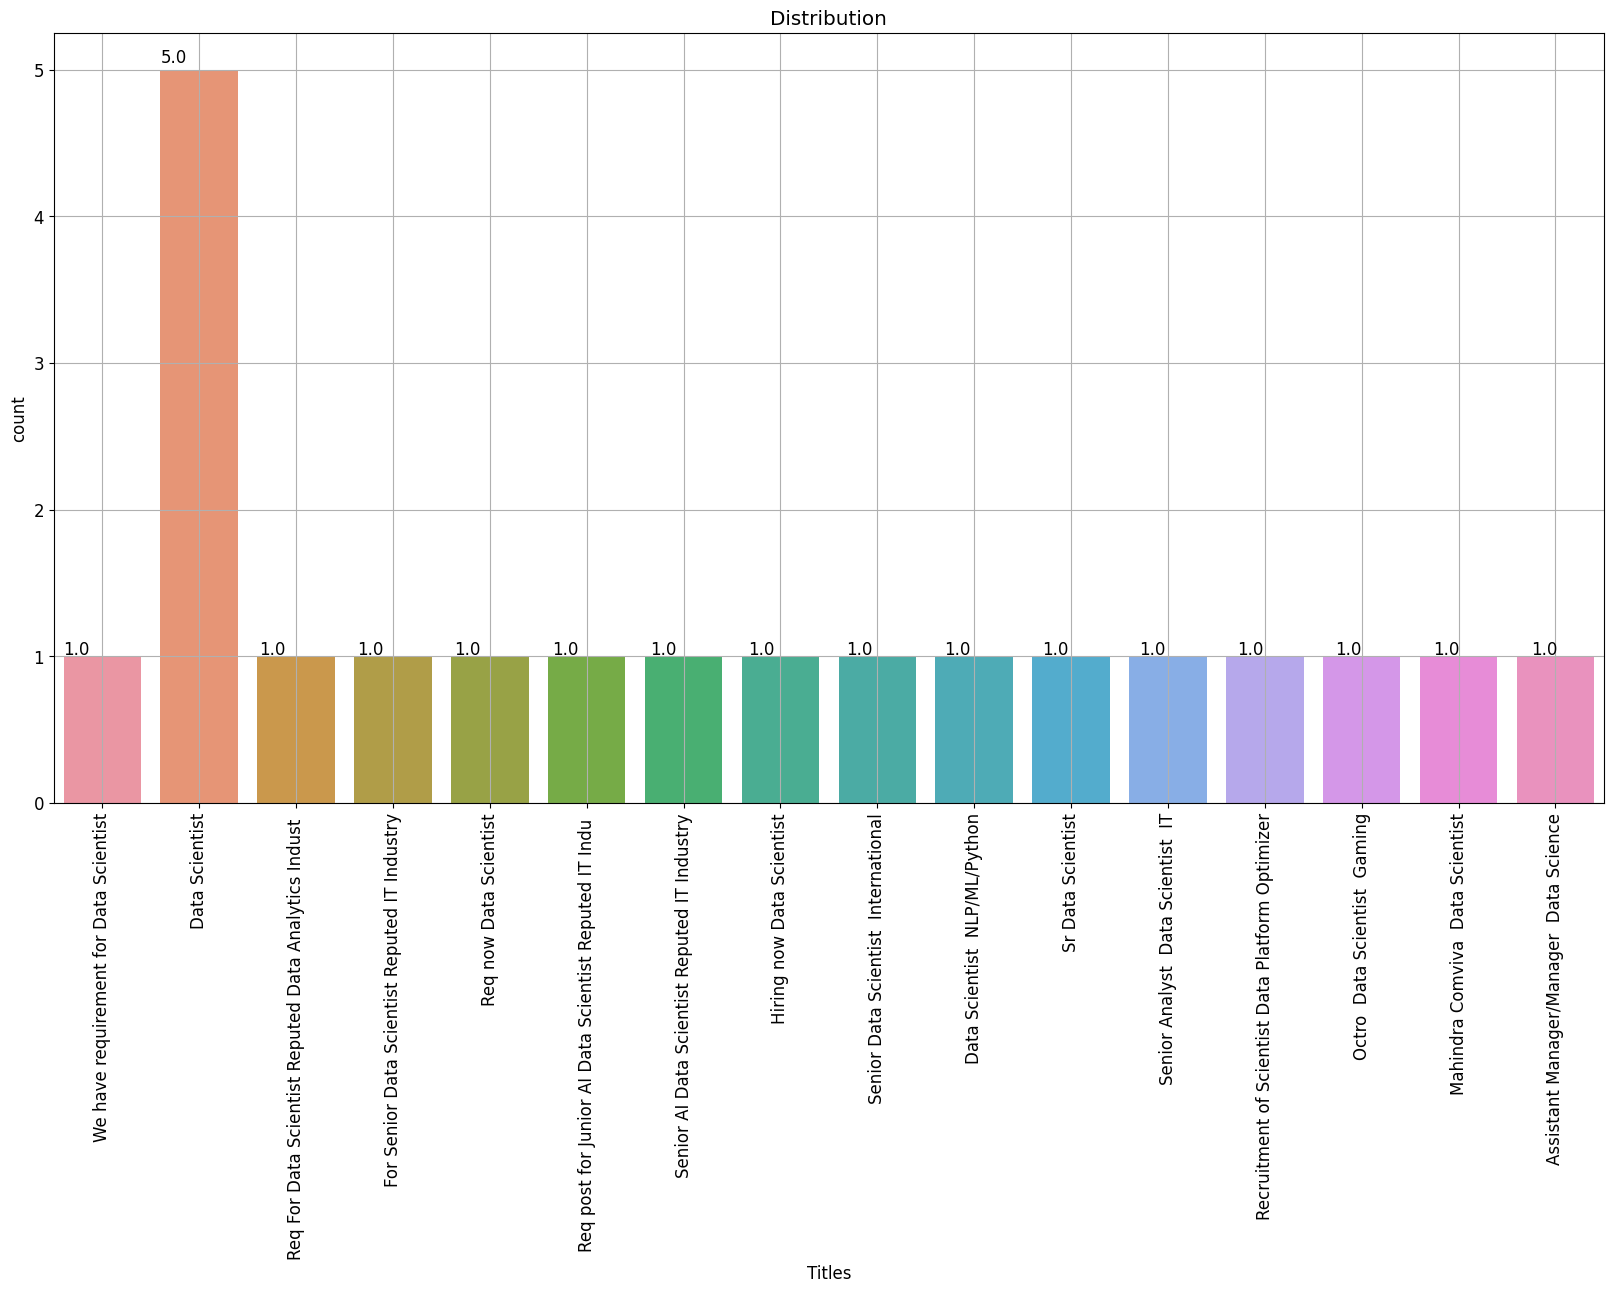

In [35]:
#Histogramme pour les titles
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax=sns.countplot(x="Titles", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()
plt.title("Distribution")

In [36]:
#Fonction pour nettoyer les données 
def clean_text(text):
       
    text = text.lower() # lowercase text
    text = text.replace('\d+', '') # remove digits
    text = re.compile('[/(){}\[\]\|@,;]').sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = re.compile('[^0-9a-z #+_]').sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in set(stopwords.words('english'))) # remove stopwors from text
    
    
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) #remplacer tous les caractères non ASCII
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    
    # remove non-english characters, punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text) 
    # tokenize word
    text = nltk.tokenize.word_tokenize(text) 
    # remove stop words
    text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(text) for text in text]

    return ' '.join(text)

In [37]:
#Appliquer la fonction de nettoyage et ajoter un nouveau colonne pour la description nettoyé 
df['Job_descrption_Clean'] = df['Job_descrption'].apply(clean_text)

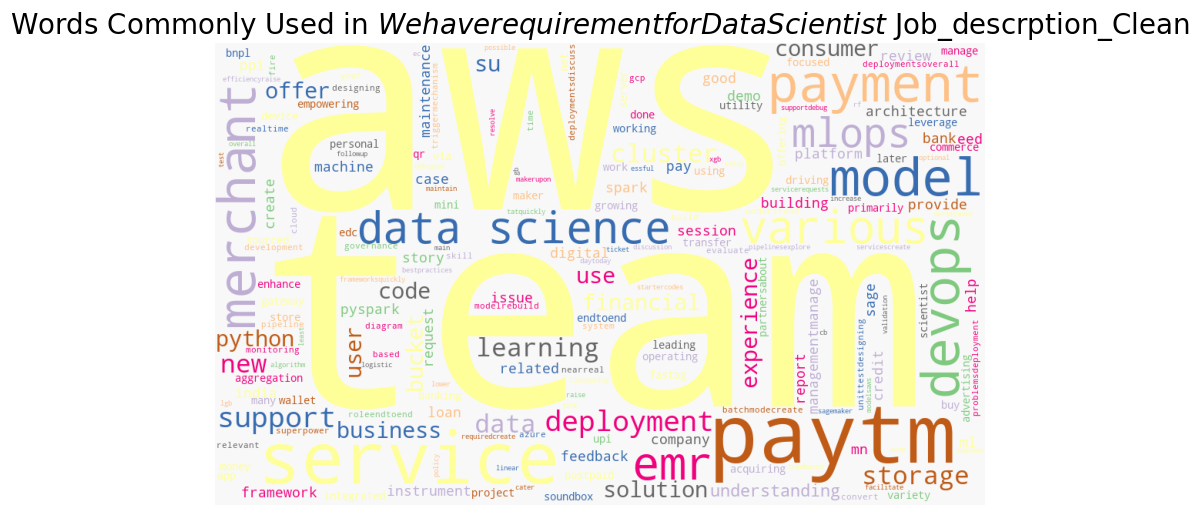

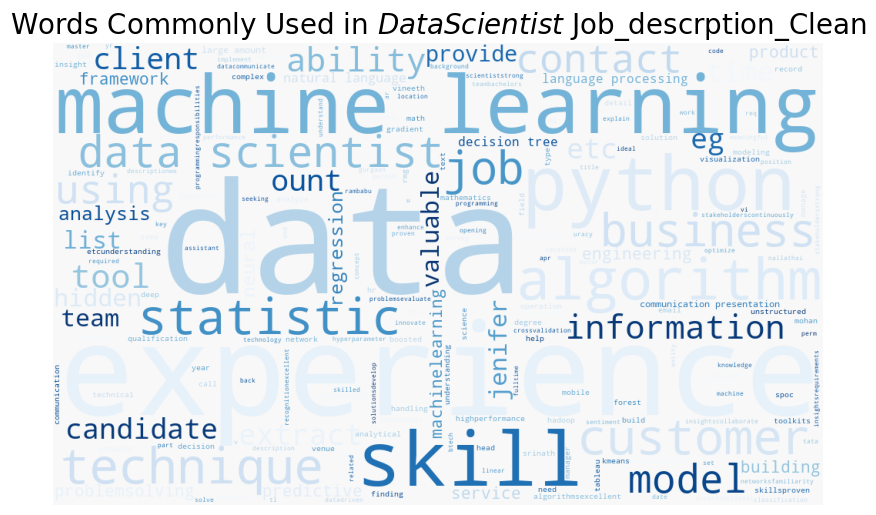

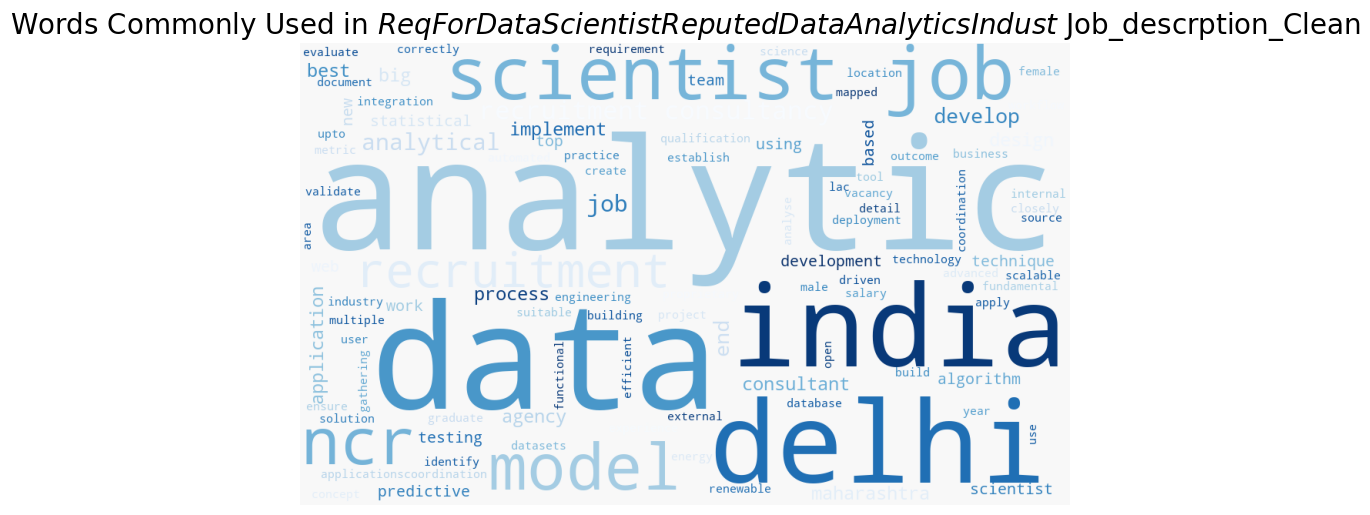

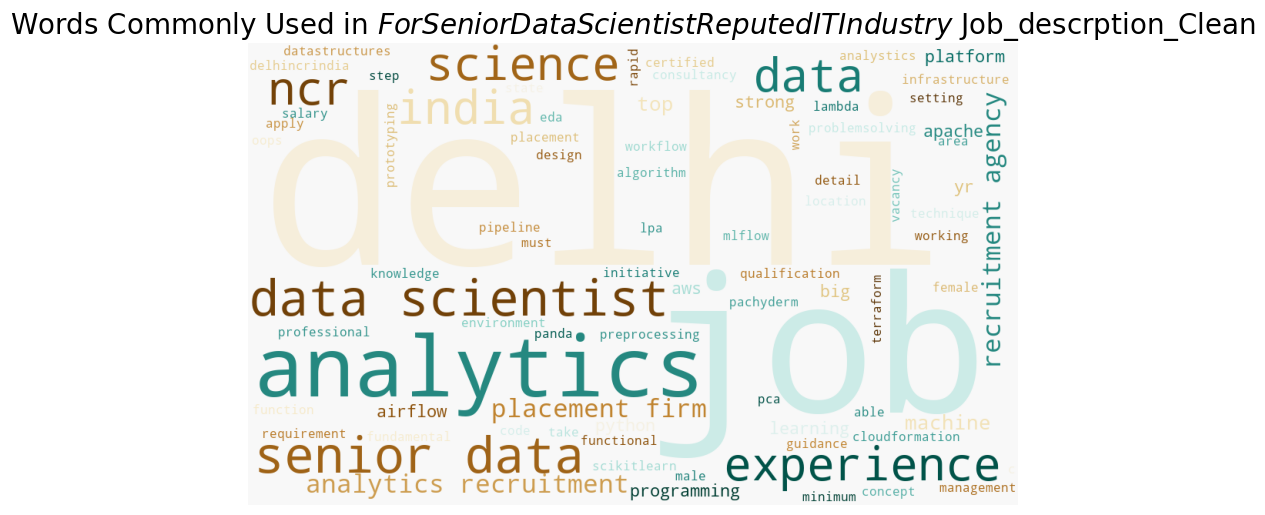

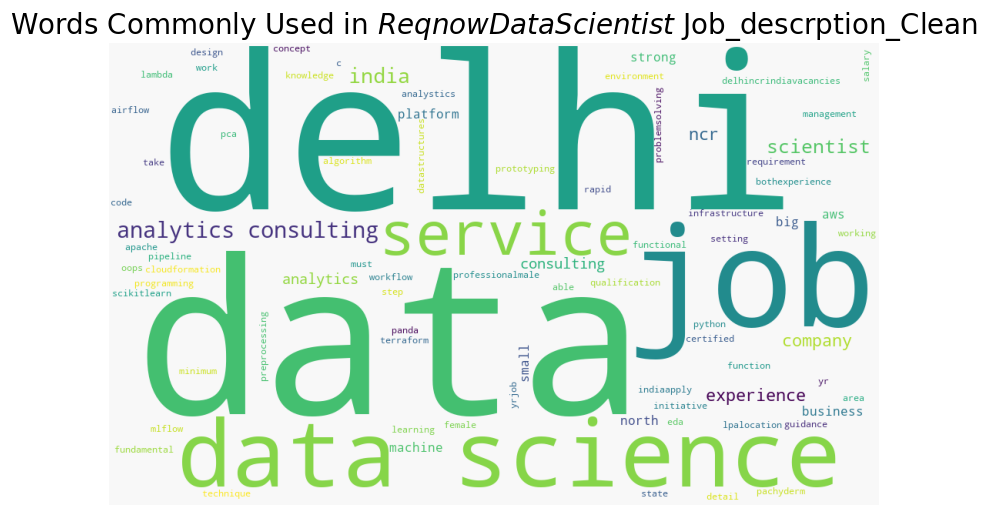

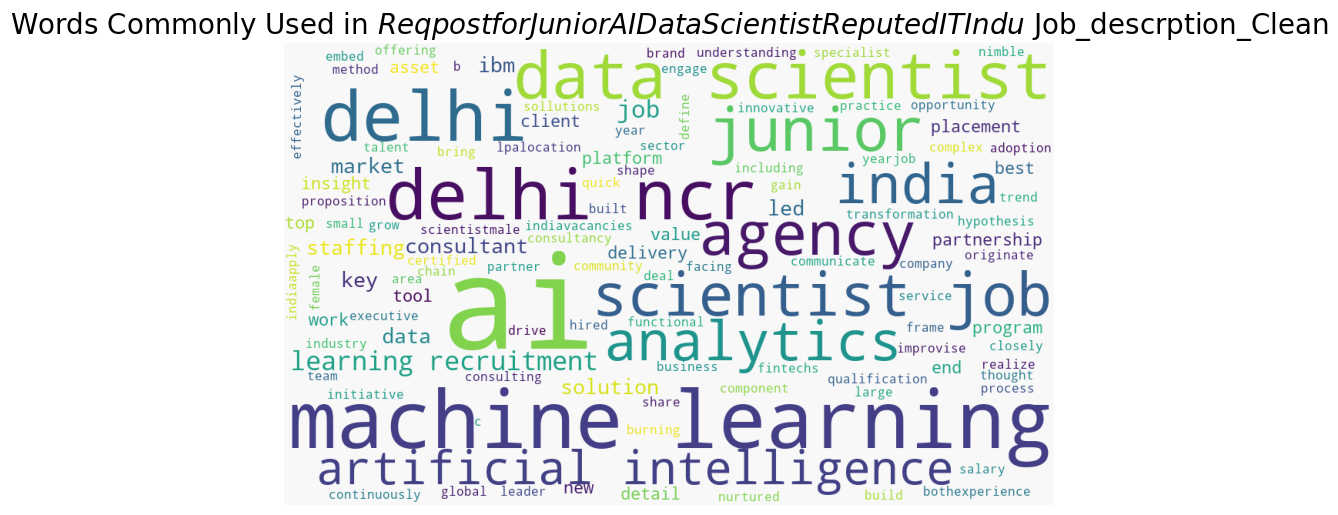

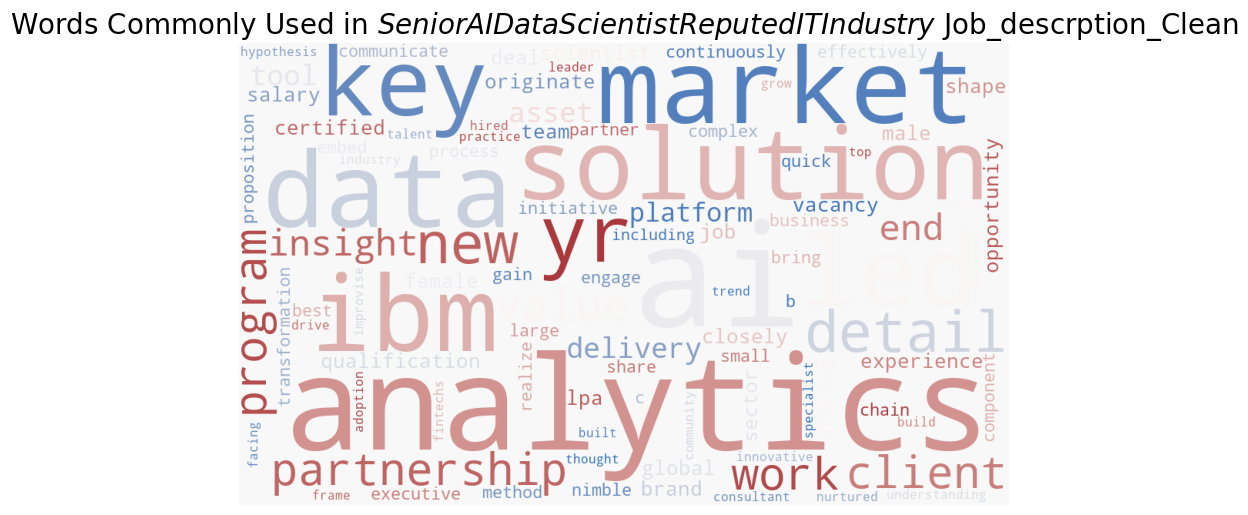

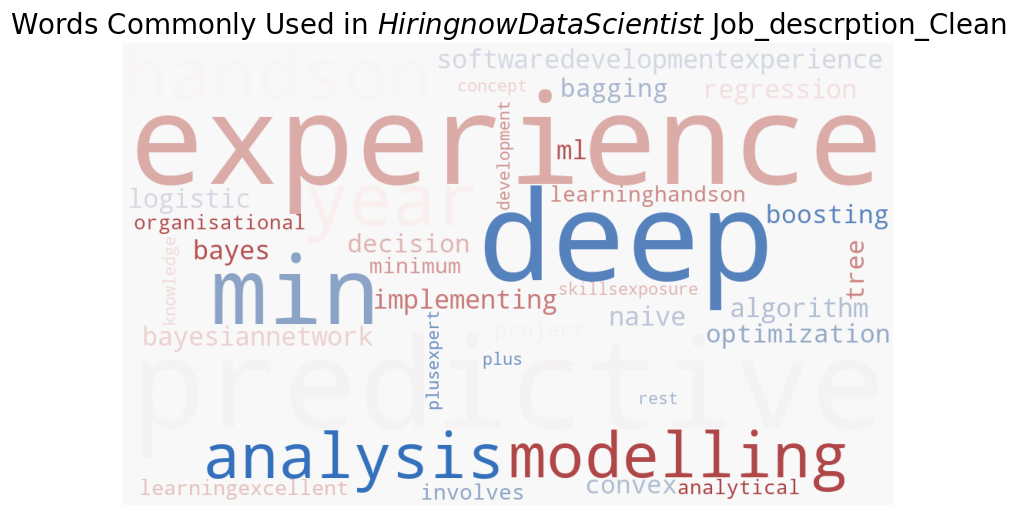

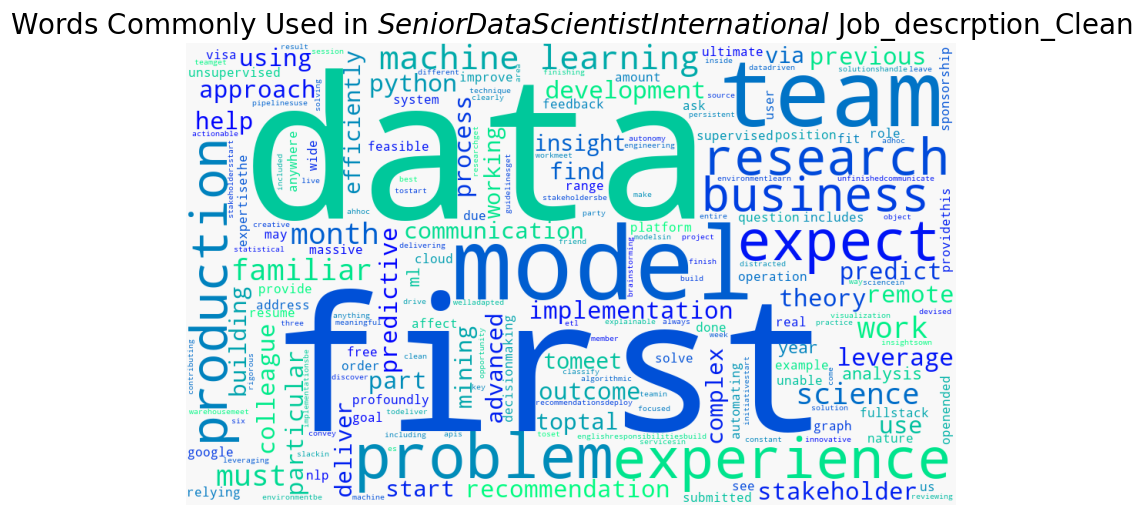

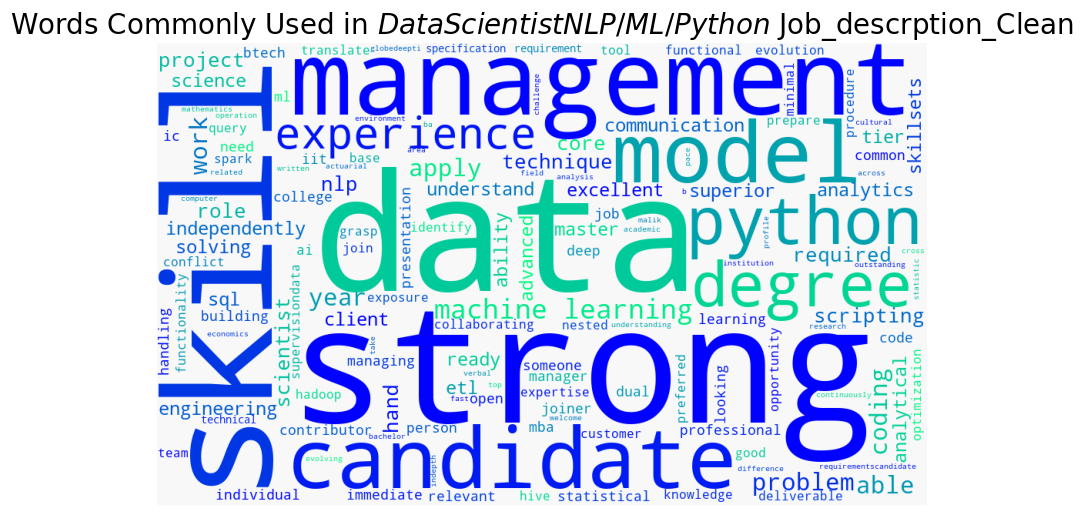

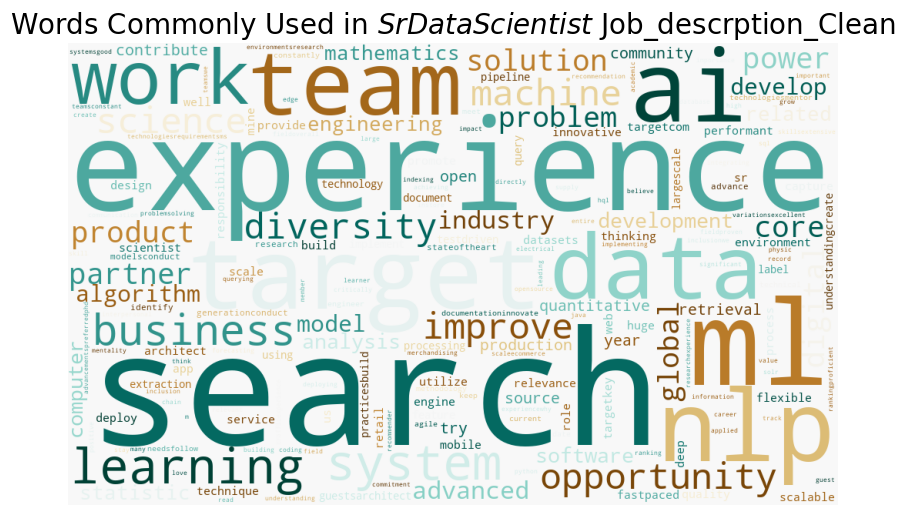

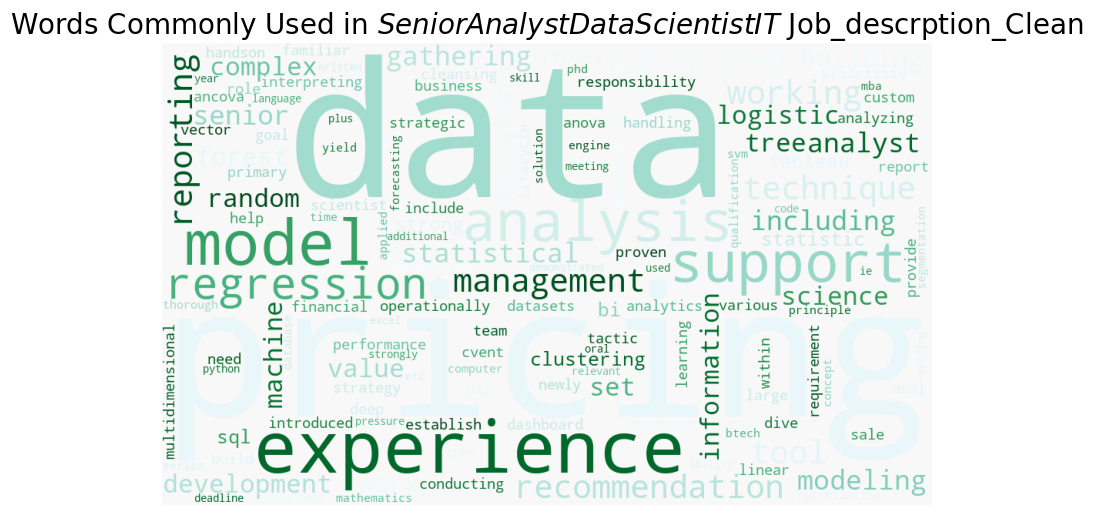

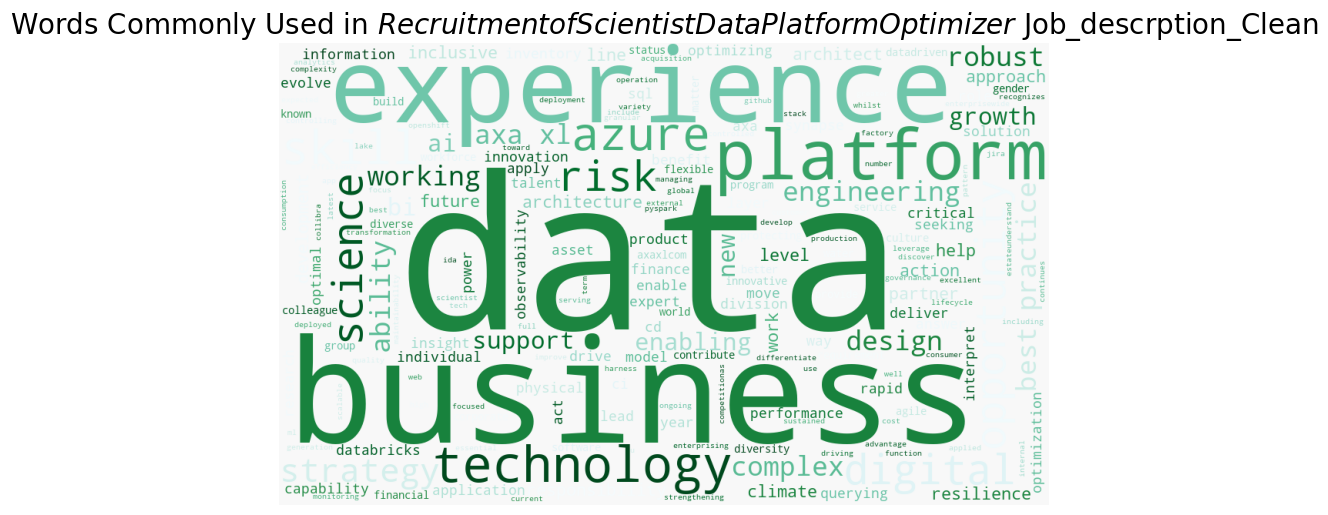

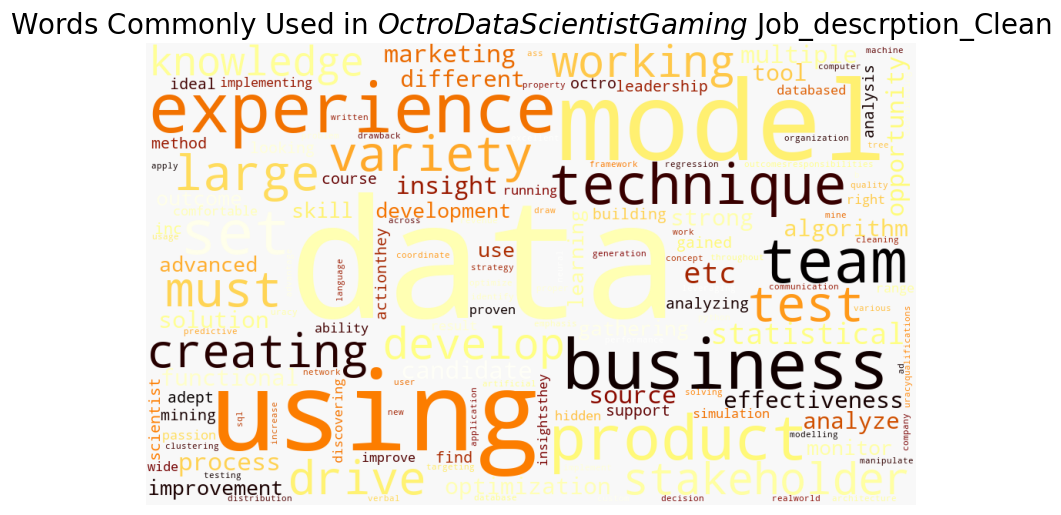

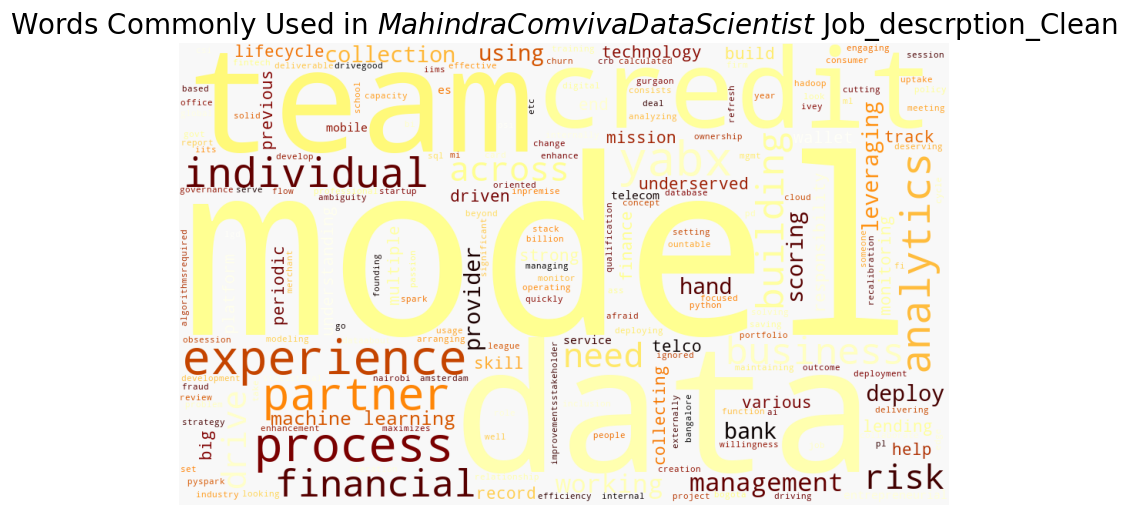

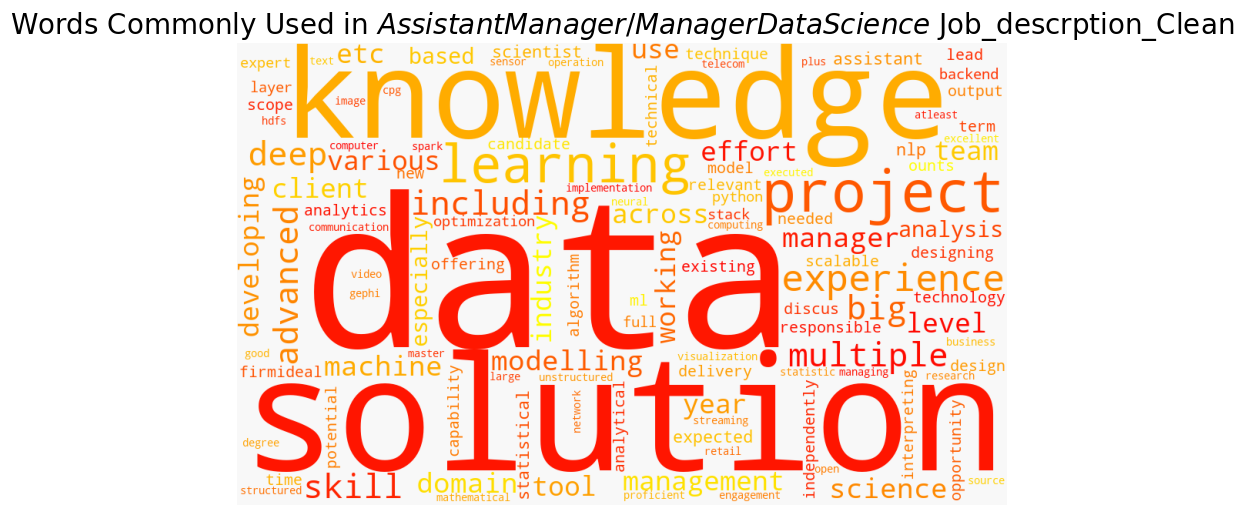

In [38]:
#Nuage de mot sur les mots les plus utilisés selon le poste d’emploi
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
for label, cmap in zip(df['Titles'].unique(), a):
    text = df.query("Titles == @label")["Job_descrption_Clean"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Job_descrption_Clean", size=20)
    plt.show()

Text(0.5, 1.0, 'Word Cloud of column Job_descrption')

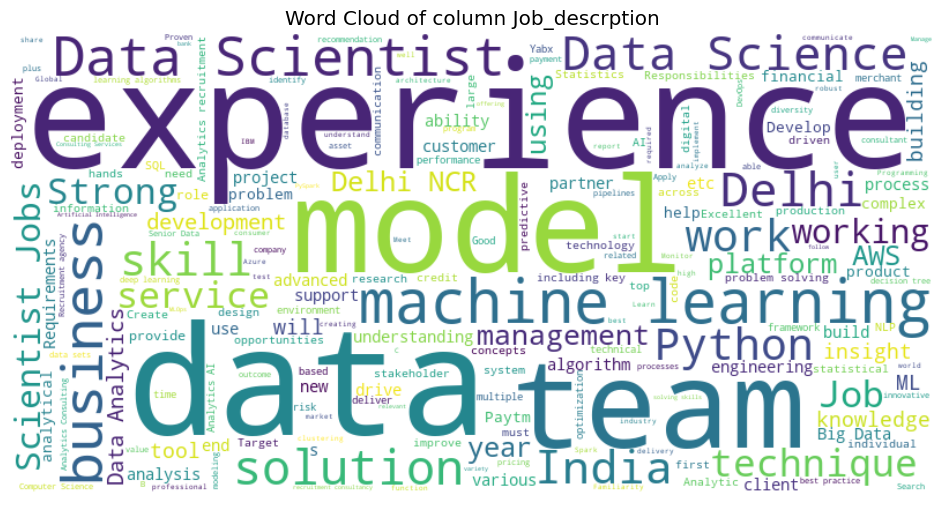

In [39]:
#Nuage de mot pour l'ensemble des mots de la colonne Job_descrption
from wordcloud import WordCloud
skills = ' '.join(df['Job_descrption'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of column Job_descrption')

Text(0.5, 1.0, 'Word Cloud of column Job_descrption_Clean')

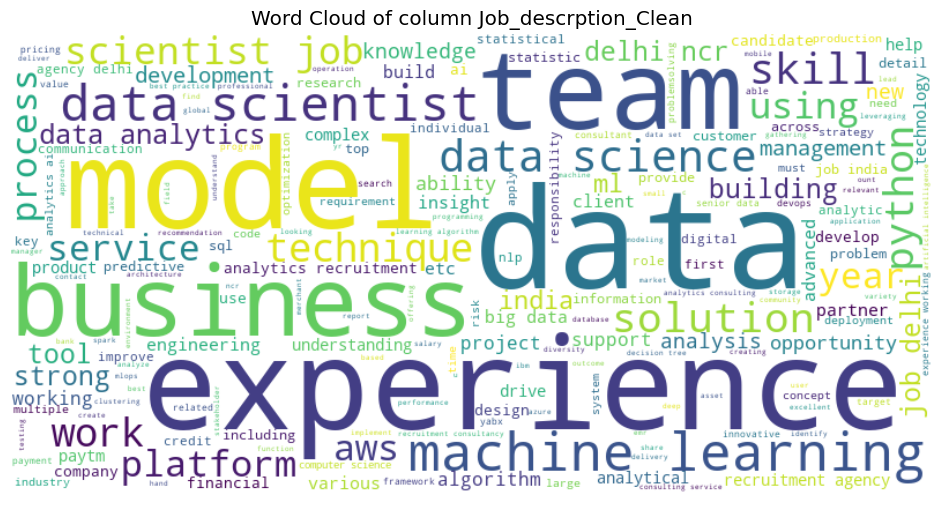

In [40]:
##Nuage de mot pour l'ensemble des mots de la colonne Job_descrption_Clean
from wordcloud import WordCloud
skills = ' '.join(df['Job_descrption_Clean'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of column Job_descrption_Clean')

In [41]:
# Sauvegarder le nuage de mots dans un fichier
# Chemin et nom de fichier de destination
path = r'C:\Users\15143\Desktop\Projet_Github\Web Scrabing Indeed\Nuage_Civision_Herras_Adil.png'
wordcloud.to_file(path)

In [42]:
#Afficher le nombre de chaque mot utilisée pour la description pour l'ensemble des mots de la colonne Job_descrption_Clean
oneSetOfStopWords = set(stopwords.words('english')+["-",'``',"''"])
totalWords =[]
Sentences = df['Job_descrption_Clean'].values
cleanedSentences = ""
for i in range(0,20):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('data', 190), ('experience', 71), ('model', 58), ('analytics', 56), ('delhi', 52), ('learning', 49), ('job', 49), ('machine', 47), ('team', 45), ('business', 44), ('scientist', 43), ('science', 38), ('india', 27), ('work', 27), ('skill', 27), ('ai', 27), ('solution', 26), ('service', 25), ('python', 25), ('technique', 24), ('ncr', 23), ('recruitment', 22), ('working', 21), ('platform', 20), ('using', 20), ('aws', 20), ('algorithm', 20), ('year', 19), ('process', 19), ('building', 18), ('tool', 18), ('strong', 18), ('ml', 17), ('development', 17), ('management', 17), ('advanced', 17), ('new', 16), ('knowledge', 16), ('analysis', 16), ('ability', 15), ('opportunity', 15), ('statistic', 15), ('project', 14), ('support', 14), ('big', 14), ('agency', 14), ('problem', 14), ('various', 13), ('build', 13), ('client', 13)]
